In [1]:
import pandas as pd
import numpy as np

# Part 1

In [2]:
# import database
passholder = pd.read_csv('/Users/leon/My Drive/BU ABA/AD654/Assignment 2/passholders23.csv')

In [3]:
passholder.head()

,passholderID,visits23,ride_avg,game_spend_avg,avg_duration,inquiries_365,discounts_23,merch_spend_average,online_spend_average,food_spend_average
0,1,3,5.8,14.8,129.4,2,3,13.6,24.5,17.3
1,2,7,6.1,17.2,328.7,7,3,14.0,25.3,17.4
2,3,7,4.9,15.7,379.6,4,1,13.4,24.7,17.6
3,4,1,4.5,26.7,247.6,3,9,13.2,22.7,22.2
4,5,3,2.7,16.3,82.4,3,0,13.2,23.2,16.0


## A

Dropping "passholderID" is necessary because this variable indicate the no. of record -- it only shows how many records are there and is not meanful for clustering. If I do not remove it, the model will take it into consideration, leading to incorrect result.

In [4]:
passholder.drop('passholderID',axis=1, inplace=True)
passholder.head()

,visits23,ride_avg,game_spend_avg,avg_duration,inquiries_365,discounts_23,merch_spend_average,online_spend_average,food_spend_average
0,3,5.8,14.8,129.4,2,3,13.6,24.5,17.3
1,7,6.1,17.2,328.7,7,3,14.0,25.3,17.4
2,7,4.9,15.7,379.6,4,1,13.4,24.7,17.6
3,1,4.5,26.7,247.6,3,9,13.2,22.7,22.2
4,3,2.7,16.3,82.4,3,0,13.2,23.2,16.0


## B

The describe() function helps me initially explore the data in each column. I can realize how many columns / rows are there and how the value are distributed in each column. It is important for analyst to explore since it informs necessary action for data preprocessing, model selection, and the overall approach to building a model, leading to better model performance and more reliable insights.

In [5]:
passholder.describe()

,visits23,ride_avg,game_spend_avg,avg_duration,inquiries_365,discounts_23,merch_spend_average,online_spend_average,food_spend_average
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,5.857500,5.052375,18.855750,235.569875,3.936250,2.948750,14.934625,24.013750,19.058875
std,2.465724,1.959060,4.028328,101.832402,2.004922,1.725499,2.163230,1.158064,3.100098
min,1.000000,-1.600000,6.000000,60.400000,0.000000,0.000000,8.200000,21.200000,9.400000
25%,4.000000,3.800000,16.200000,146.875000,2.000000,2.000000,13.400000,23.200000,17.075000
50%,6.000000,5.100000,18.800000,240.350000,4.000000,3.000000,14.900000,24.000000,19.100000
75%,7.000000,6.400000,21.400000,320.175000,5.000000,4.000000,16.400000,24.900000,21.100000
max,15.000000,11.400000,33.000000,410.000000,15.000000,11.000000,21.400000,28.800000,29.200000


## C
### a.
There are no missing values in passholder dataset.

In [6]:
passholder.isnull().sum()

visits23                0
ride_avg                0
game_spend_avg          0
avg_duration            0
inquiries_365           0
discounts_23            0
merch_spend_average     0
online_spend_average    0
food_spend_average      0
dtype: int64

### b.

"ride_avg" column indicates the average number of rides taken per visit for that passholder across the 2023 season. The minimum number should be 0, meaning there is no ride taken. However, the minimum value is -1.6, which is a impossible value.

To fix this, I decided to replace values, which are lower than 0, to 0.

In [7]:
passholder.loc[passholder['ride_avg']<0,'ride_avg'] = 0

In [8]:
passholder.describe()

,visits23,ride_avg,game_spend_avg,avg_duration,inquiries_365,discounts_23,merch_spend_average,online_spend_average,food_spend_average
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,5.857500,5.056250,18.855750,235.569875,3.936250,2.948750,14.934625,24.013750,19.058875
std,2.465724,1.947884,4.028328,101.832402,2.004922,1.725499,2.163230,1.158064,3.100098
min,1.000000,0.000000,6.000000,60.400000,0.000000,0.000000,8.200000,21.200000,9.400000
25%,4.000000,3.800000,16.200000,146.875000,2.000000,2.000000,13.400000,23.200000,17.075000
50%,6.000000,5.100000,18.800000,240.350000,4.000000,3.000000,14.900000,24.000000,19.100000
75%,7.000000,6.400000,21.400000,320.175000,5.000000,4.000000,16.400000,24.900000,21.100000
max,15.000000,11.400000,33.000000,410.000000,15.000000,11.000000,21.400000,28.800000,29.200000


## D.
### a.
My data needed to be standardized because each column are using different measurement.

### b.
Standardization Result:

In [9]:
from sklearn.preprocessing import StandardScaler
passholder_std = pd.DataFrame(StandardScaler().fit_transform(passholder), columns=passholder.columns)

In [10]:
pd.options.display.float_format = '{:.2f}'.format
passholder_std.describe()

,visits23,ride_avg,game_spend_avg,avg_duration,inquiries_365,discounts_23,merch_spend_average,online_spend_average,food_spend_average
count,800.00,800.00,800.00,800.00,800.00,800.00,800.00,800.00,800.00
mean,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.97,-2.60,-3.19,-1.72,-1.96,-1.71,-3.12,-2.43,-3.12
25%,-0.75,-0.65,-0.66,-0.87,-0.97,-0.55,-0.71,-0.70,-0.64
50%,0.06,0.02,-0.01,0.05,0.03,0.03,-0.02,-0.01,0.01
75%,0.46,0.69,0.63,0.83,0.53,0.61,0.68,0.77,0.66
max,3.71,3.26,3.51,1.71,5.52,4.67,2.99,4.14,3.27


## E.

The 5 variables I'am going to use are "visits23", "game_spend_avg", "avg_duration", "merch_spend_average" and "food_spend_average".

I think management level would be very interested in the revenue, and the times of visiting and time of staying are closely related to the revenue. Here I did not include online_spend because it is made online -- which is not too related to the in-person visit situation here.

In [11]:
variable = ('visits23','game_spend_avg','avg_duration','merch_spend_average','food_spend_average')
cluster_df = passholder_std.loc[:,variable]
cluster_df.head()

,visits23,game_spend_avg,avg_duration,merch_spend_average,food_spend_average
0,-1.16,-1.01,-1.04,-0.62,-0.57
1,0.46,-0.41,0.92,-0.43,-0.54
2,0.46,-0.78,1.42,-0.71,-0.47
3,-1.97,1.95,0.12,-0.80,1.01
4,-1.16,-0.63,-1.51,-0.80,-0.99


## F
Elbow Chart

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

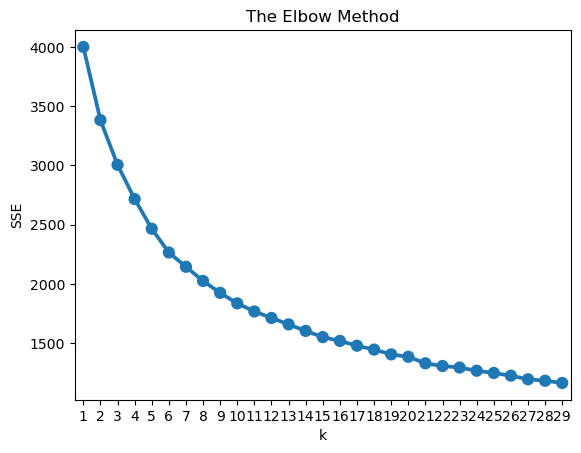

In [13]:
sse = {}
for k in range(1, 30):
# Initialize KMeans with k clusters
    kmeans = KMeans(n_clusters=k, random_state=654,n_init=10)
# Fit KMeans on the normalized dataset
    kmeans.fit(cluster_df)
    sse[k] = kmeans.inertia_
# Add the plot title "The Elbow Method"
plt.title('The Elbow Method')
# Add X-axis label "k"
plt.xlabel('k')
# Add Y-axis label "SSE"
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()));

## G.
I will use k = 6 in cluster model since I think there is a obvious "elbow" appear around k = 6.

## H. Applying k =6

In [14]:
kmeans = KMeans(n_clusters=6, random_state=654,n_init=10)
kmeans.fit(cluster_df)
cluster_labels = kmeans.labels_

## I. Show statistic of my cluster

In [15]:
kmeans2 = cluster_df.assign(Cluster = cluster_labels)
kmeans2.groupby(['Cluster']).agg({
'visits23': 'mean',
'game_spend_avg': 'mean',
'avg_duration': 'mean',
'merch_spend_average': 'mean',
'food_spend_average': ['mean','count']
}).round(2)

visits23 game_spend_avg avg_duration merch_spend_average  \
            mean           mean         mean                mean   
Cluster                                                            
0          -0.37           0.32         0.87               -0.40   
1           1.29          -0.40         0.64               -0.38   
2          -0.51          -0.84        -0.88               -0.54   
3          -0.54          -0.21         0.75                0.53   
4          -0.10           1.13        -0.72               -0.47   
5           0.26           0.19        -0.57                1.19   

        food_spend_average        
                      mean count  
Cluster                           
0                    -1.08   130  
1                     0.08   131  
2                    -0.18   147  
3                     0.92   132  
4                     0.58   120  
5                    -0.24   140

## J. Visualization

### visits 23:
It is obvious that Cluster 1 includes those who visit many times, followed by Cluster 5. The amount of visits23 in Cluster 0,2,3 are lower than the average.

### game_spend_avg:

AS for game_spend_avg, the dominant are in Cluster4, followed by Cluster 0 and Cluster 5. Those in Cluster 2 are the lowest.

### avg_duration:
People in Cluster 0 spend more time in the Lobsterland than others, while people in Cluster 1 spend the lowest amount of time.

### merch_spend_average:
People in Cluster 5 spend the most amount of money in merchandise than amoung all Cluster, followed by Cluster 3


In [16]:
# insert "Cluster" column to original passholder dataset
passholder_cluster = passholder
passholder_cluster['Cluster'] = kmeans2['Cluster']
passholder_cluster['Cluster'] = passholder_cluster['Cluster'].astype('category')

### 1st Plot: Average Spending on Food for each cluster

In Cluster 3, there are more amount of spending on food, while Cluster 0 has the lowest. From this I can easily realize that people in cluster 3 usually spend more on food.

Text(0.5, 1.0, 'Average Spending on Food')

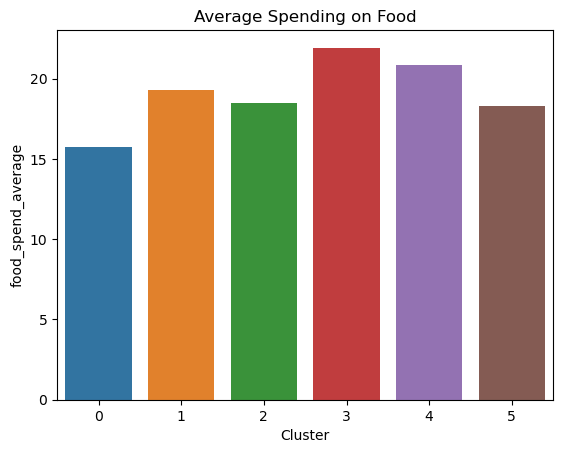

In [17]:
sns.barplot(x='Cluster', y='food_spend_average', data=passholder_cluster, errorbar=None)
plt.title('Average Spending on Food')

### 2nd Plot: Average duration for each Cluster
 People in Cluster 0 spend the most amount of time in Lobsterland. However, and Cluster 1 and 3 have similar amount of time. However, people in Cluster 2, 4 and 5 spend relatively less time.

Text(0.5, 1.0, 'Average duration')

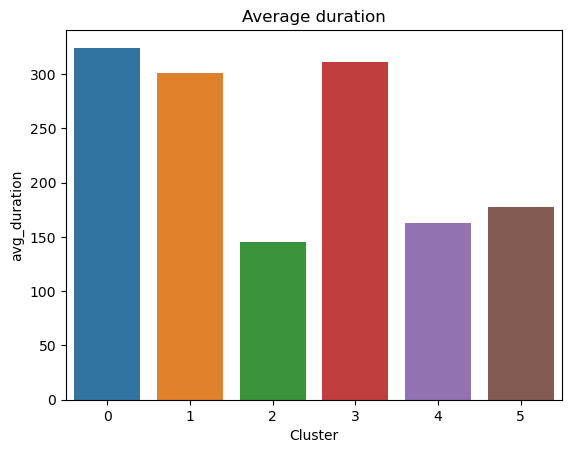

In [18]:
sns.barplot(x='Cluster', y='avg_duration', data=passholder_cluster, errorbar=None)
plt.title('Average duration')

### 3rd Plot: Amount of Visiting
People in Cluster 1 visit more time than others, and it is a relatively significant differences comparing to other Clusters.

Text(0.5, 1.0, 'Amount of Visiting LobsterLand')

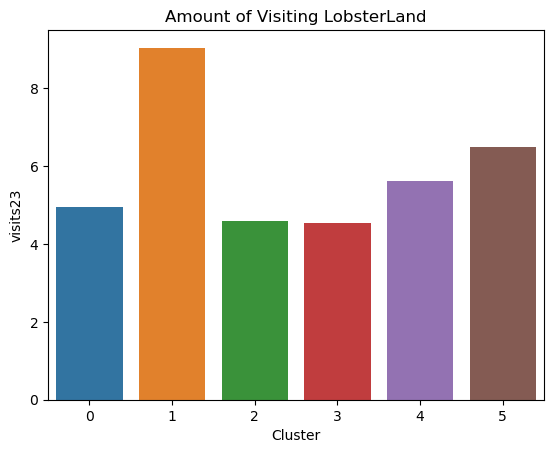

In [19]:
sns.barplot(x='Cluster', y='visits23', data=passholder_cluster, errorbar=None)
plt.title('Amount of Visiting LobsterLand')

### 4th Plot: Relation of Staying Duration and Average Spending on Merchandise

In this scatterplot we can see that Cluster 5 stands out on merchandise spending while they are not the group who staying the longest in the park. In the contrast, people in Cluster 0 spend the most amount of time in the Lobsterland but spend the lowest on merchandise.

In [20]:
cor_duration_merspend = passholder_cluster.groupby('Cluster')[['avg_duration','merch_spend_average']].mean()

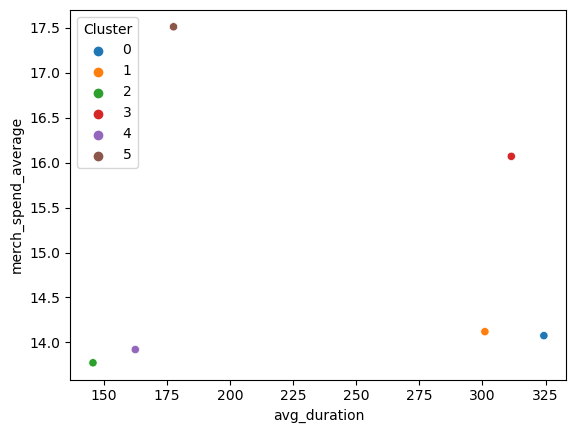

In [21]:
sns.scatterplot(cor_duration_merspend, x="avg_duration", y="merch_spend_average", hue="Cluster");

## K. Labeling each cluster

Firstly I build plots to find out the specidic traits of each Cluster. From the plot below, I decided to naming:


*   Cluster 0 -- Time-Rich, Budget-Savvy

People in this group are staying longer than others, but they spend the least on food, with a bit less on merchandise as well. They are economical and choosy with their food purchases, avoiding additional on-site purchases.


*   Cluster 1 -- Loyal Bargain Hunters

People in this group re-visit the park the most and also spending lots of time inside, but they spend less on food / merchandise and game. They are very loyal but seem to focuse on getting value for their money with less extra spending in park.


*   Cluster 2 -- One-and-Done Nibblers

People in this group stay for short periods, spends the least on games, merchandise and revisits, but spends slightly above average on food. They come for a quick, one-time visit, spends little on non-food items, but indulges slightly on the food offered during their brief stay


*   Cluster 3 -- Big Spender Foodies

People in this group spends the most on food, has above average stay times and merchandise spending, but below average game spending and revisits. They love food and indulging in it when they visit, staying longer to enjoy the food offerings and shopping more than playing games or coming back frequently.



*   Cluster 4 -- Game-Focused Regulars

People in this group spends the most on games, has above average food spending and revisits, but below average stay times and merchandise spending. They focused on the games during their visits, coming back regularly despite not staying overly long per visit or spending much on extras like food and souvenirs. Their priority is the games and returning to play again.


*   Cluster 5 -- Souvenir-Loving Loyalists


People in this group spends the most on merchandise, has above average revisits and game spending, but below average stay times and food spending. They focused on purchasing souvenirs, returning often to shop the merchandise again, but don't prioritize lengthy stays or indulging in food offerings. Their loyalty is shown through repeat visits and merchandise purchases.













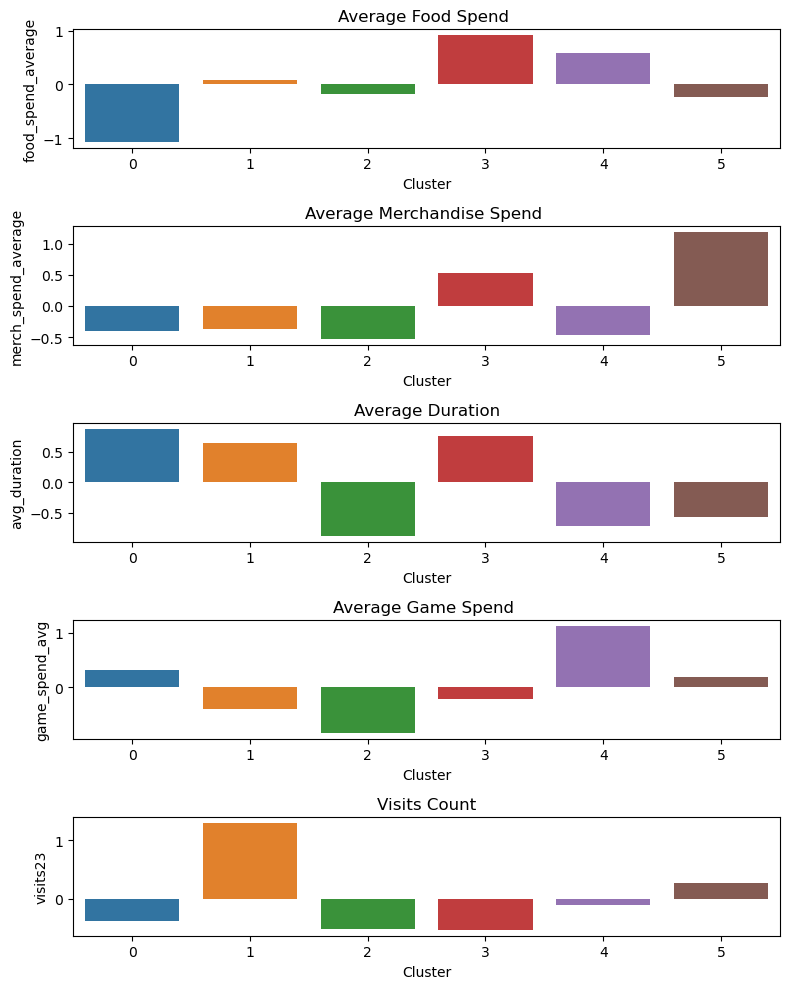

In [22]:
fig, axes = plt.subplots(5, 1, figsize=(8, 10))  # 5 rows, 1 column of subplots

# Plot each barplot on its respective subplot
sns.barplot(x='Cluster', y='food_spend_average', data=kmeans2, errorbar=None, ax=axes[0])
sns.barplot(x='Cluster', y='merch_spend_average', data=kmeans2, errorbar=None, ax=axes[1])
sns.barplot(x='Cluster', y='avg_duration', data=kmeans2, errorbar=None, ax=axes[2])
sns.barplot(x='Cluster', y='game_spend_avg', data=kmeans2, errorbar=None, ax=axes[3])
sns.barplot(x='Cluster', y='visits23', data=kmeans2, errorbar=None, ax=axes[4])

# Customize the subplots
axes[0].set_title('Average Food Spend ')
axes[1].set_title('Average Merchandise Spend ')
axes[2].set_title('Average Duration')
axes[3].set_title('Average Game Spend ')
axes[4].set_title('Visits Count')

# Adjust spacing between subplots
plt.tight_layout()

# Show the combined plot
plt.show()

In [23]:
# Change the category name in Cluster
passholder_cluster['Cluster'] = passholder_cluster['Cluster'].astype('category')
passholder_cluster['Cluster'] = passholder_cluster['Cluster'].cat.rename_categories({
    0: 'Time-Rich, Budget-Savvy',
    1: 'Loyal Bargain Hunters',
    2: 'One-and-Done Nibblers',
    3: 'Big Spender Foodies',
    4: 'Game-Focused Regulars',
    5: 'Souvenir-Loving Loyalists'
})

## L.

We can use this model to understand what traits people in each group share, then build a customized marketing strategy for each group to maximize profit. For the off-season winter months, I think we should target and engage more with the "Souvenir-Loving Loyalists" group. This is the second largest group in terms of number of people and frequency of revisits, representing a huge business opportunity. We can do the following strategies to attract them more during the winter:



*   Winter-Themed Souvenirs: Create unique, winter-themed souvenirs that are exclusive to your store. This could include items like custom snow globes, holiday ornaments, or cozy winter apparel like scarves and gloves.

*   Winter Events: Host special winter events and activities in and around your store. This might include live music, hot cocoa stations, or holiday crafting workshops. Use these events to draw people in and encourage repeat visits.

*   Frequent Shopper Discounts: Reward frequent shoppers with discounts or exclusive access to limited-edition winter souvenirs. Consider creating a tiered membership program for your best customers.

*   Winter Discounts and Bundles: Offer discounts and bundled deals for purchasing multiple souvenirs. This encourages customers to buy more items during their visit.

On the other hand, the "One-and-Done Nibblers" group should be the last priority for engagement, even though they are the largest group. This is because all of their KPIs are below average, apart from relatively higher food spending compared to others. It is clear that they are just stopping in for a meal rather than being very loyal to Lobster Land.








In [24]:
passholder_cluster['Cluster'].value_counts()

One-and-Done Nibblers        147
Souvenir-Loving Loyalists    140
Big Spender Foodies          132
Loyal Bargain Hunters        131
Time-Rich, Budget-Savvy      130
Game-Focused Regulars        120
Name: Cluster, dtype: int64

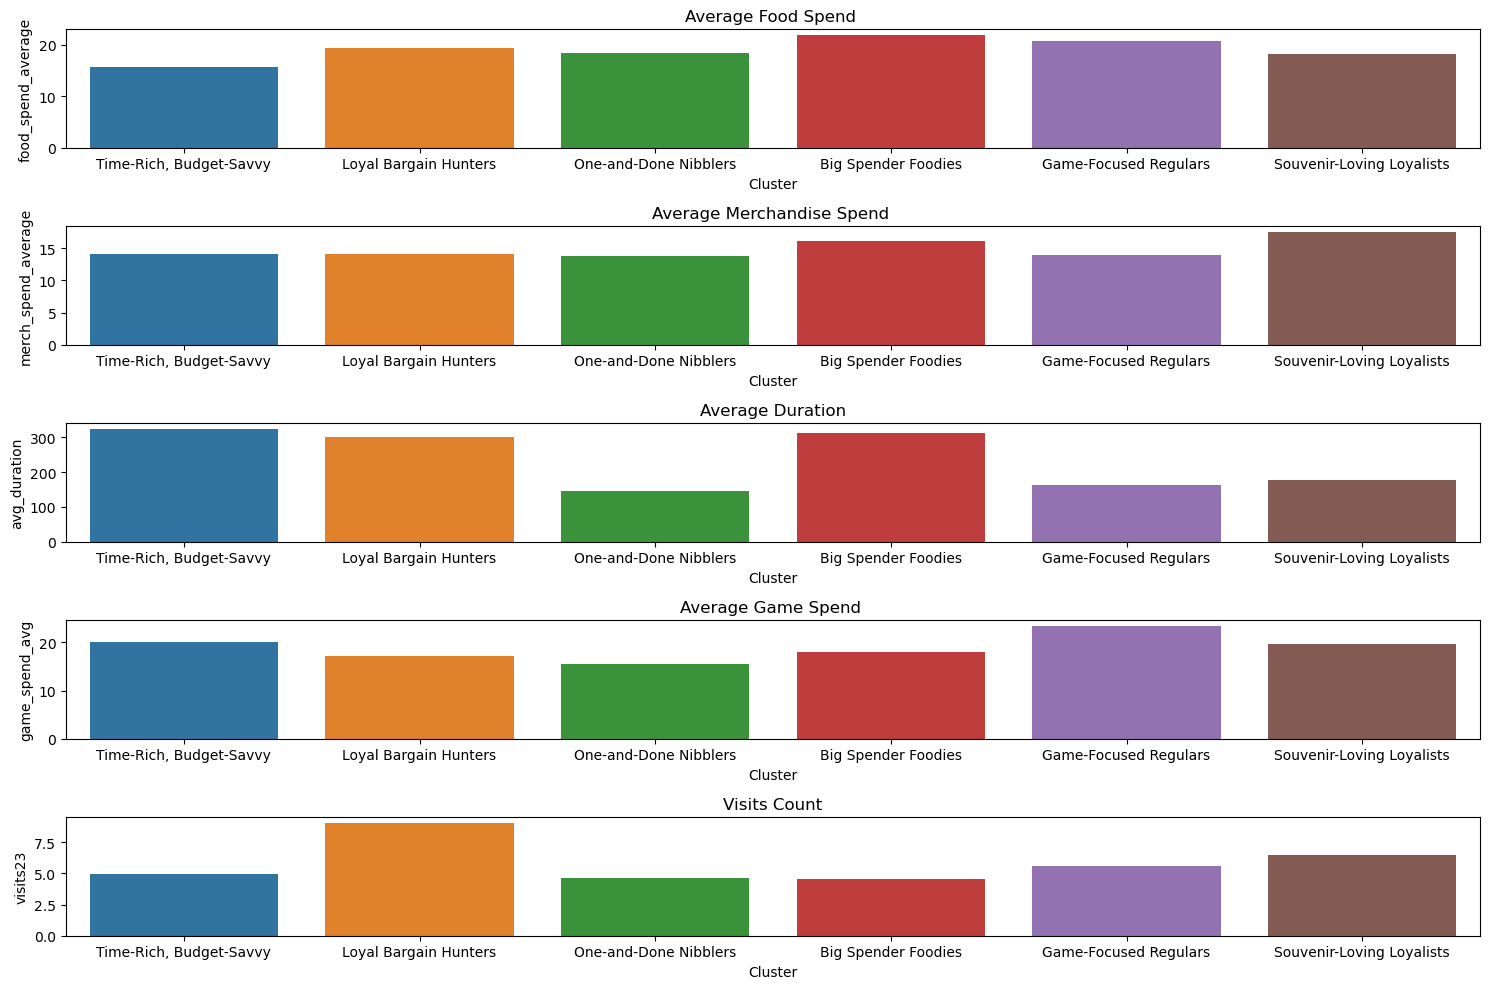

In [25]:
fig, axes = plt.subplots(5, 1, figsize=(15, 10))  # 5 rows, 1 column of subplots

# Plot each barplot on its respective subplot
sns.barplot(x='Cluster', y='food_spend_average', data=passholder_cluster, errorbar=None, ax=axes[0])
sns.barplot(x='Cluster', y='merch_spend_average', data=passholder_cluster, errorbar=None, ax=axes[1])
sns.barplot(x='Cluster', y='avg_duration', data=passholder_cluster, errorbar=None, ax=axes[2])
sns.barplot(x='Cluster', y='game_spend_avg', data=passholder_cluster, errorbar=None, ax=axes[3])
sns.barplot(x='Cluster', y='visits23', data=passholder_cluster, errorbar=None, ax=axes[4])

# Customize the subplots
axes[0].set_title('Average Food Spend ')
axes[1].set_title('Average Merchandise Spend ')
axes[2].set_title('Average Duration')
axes[3].set_title('Average Game Spend ')
axes[4].set_title('Visits Count')

# Adjust spacing between subplots
plt.tight_layout()

# Show the combined plot
plt.show()

# Part 2

## A.

In [26]:
# import database
new_gold = pd.read_csv('/Users/leon/My Drive/BU ABA/AD654/Assignment 2/new_gold23.csv')

## B.

Numeric: bundleID, coaster_sim, jukebox_run, avg_rating

Category: music_physical, sports_physical, retro_arcade, pinball, tough_skill, crane_prizes

In [27]:
new_gold.head()

,bundleID,music_physical,sports_physical,retro_arcade,pinball,tough_skill,coaster_sim,jukebox_run,crane_prizes,avg_rating
0,1,Guitar Hero,Connect Four Hoops,Mortal Kombat,Jurassic Park,Shape_Stack,60,1,stuffed animals,5.29
1,2,Guitar Hero,Connect Four Hoops,Mortal Kombat,Jurassic Park,Shape_Stack,60,1,ticket bundles,4.20
2,3,Guitar Hero,Connect Four Hoops,Mortal Kombat,Jurassic Park,Shape_Stack,60,1,candy bag,3.85
3,4,Guitar Hero,Connect Four Hoops,Mortal Kombat,Jurassic Park,Shape_Stack,60,2,stuffed animals,6.35
4,5,Guitar Hero,Connect Four Hoops,Mortal Kombat,Jurassic Park,Shape_Stack,60,2,ticket bundles,5.87


## C.
Input variables should be dummified because they represent categories in the survey. For linear regression model we are going to use, it is better to dummify to prevent the model from mistakenly consider them as contineous numeric.

In [28]:
new_gold.drop('bundleID',axis=1, inplace=True)
new_gold.head()

,music_physical,sports_physical,retro_arcade,pinball,tough_skill,coaster_sim,jukebox_run,crane_prizes,avg_rating
0,Guitar Hero,Connect Four Hoops,Mortal Kombat,Jurassic Park,Shape_Stack,60,1,stuffed animals,5.29
1,Guitar Hero,Connect Four Hoops,Mortal Kombat,Jurassic Park,Shape_Stack,60,1,ticket bundles,4.20
2,Guitar Hero,Connect Four Hoops,Mortal Kombat,Jurassic Park,Shape_Stack,60,1,candy bag,3.85
3,Guitar Hero,Connect Four Hoops,Mortal Kombat,Jurassic Park,Shape_Stack,60,2,stuffed animals,6.35
4,Guitar Hero,Connect Four Hoops,Mortal Kombat,Jurassic Park,Shape_Stack,60,2,ticket bundles,5.87


In [29]:
# Dummy all input variables. Output variable = avg_rating.
new_gold_dummy = pd.get_dummies(new_gold,drop_first = True,columns = ['music_physical','sports_physical','retro_arcade','pinball','tough_skill','coaster_sim','jukebox_run','crane_prizes'])
new_gold_dummy.head()

,avg_rating,music_physical_Guitar Hero,music_physical_MaiMai Orange,sports_physical_Connect Four Hoops,sports_physical_QB Toss Challenge,retro_arcade_Mortal Kombat,retro_arcade_Ninja Turtles,retro_arcade_Simpsons,pinball_Indiana Jones,pinball_Jurassic Park,...,tough_skill_Reel Big Fish,tough_skill_Shape_Stack,coaster_sim_180,coaster_sim_540,coaster_sim_720,jukebox_run_2,jukebox_run_3,jukebox_run_4,crane_prizes_stuffed animals,crane_prizes_ticket bundles
0,5.29,1,0,1,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
1,4.20,1,0,1,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
2,3.85,1,0,1,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
3,6.35,1,0,1,0,1,0,0,0,1,...,0,1,0,0,0,1,0,0,1,0
4,5.87,1,0,1,0,1,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1


## D. Building Linear Regression Model

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [31]:
X = new_gold_dummy.iloc[:,1:]
y = new_gold_dummy['avg_rating']

In [32]:
regressor = LinearRegression()
regressor.fit(X,y)

LinearRegression()

## E. Coefficient value of new_gold



In [33]:
coef_new_gold = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coef_new_gold

,Coefficient
music_physical_Guitar Hero,-0.11
music_physical_MaiMai Orange,-0.42
sports_physical_Connect Four Hoops,1.04
sports_physical_QB Toss Challenge,-0.37
retro_arcade_Mortal Kombat,-0.52
retro_arcade_Ninja Turtles,0.15
retro_arcade_Simpsons,0.26
pinball_Indiana Jones,-0.08
pinball_Jurassic Park,-0.17
pinball_Monopoly,0.20


## F.

In summary, the prefer option for each variables are:
* **music_physical:** Dance Dance Revolution
* **sports_physical:** Connect Four Hoops
* **retro_arcade:** Simpsons
* **pinball:** Monopoly
* **tough_skill:** Big Wheel
* **crane_prize:** Ticket bundles
* **coaster_sim:** 540 seconds
* **jukebox_run:** 4 times

Based on the results above, here are some recommendations on marketing strategies to further enhance customer satisfaction:
* Emphasize and promote the Dance Dance Revolution and Connect Four Hoops machines more.
* Propose a collaboration with Simpsons - for example, obtaining copyrights on machine designs, decorations, and branding across Lobster Land. We could even host a "Simpsons" festival to boost overall profits.
* Re-design the ticket bundles to include prizes from customers' preferred games.


# Part III.

I saw this ad when browsing the internet -- marketing about the Disney Bundle (Hulu, Disney+ and ESPN+). I think its target marketing segment is people who spend a lot of time watching videos online and also love diverse content.

These three video-streaming platforms specialize in different areas, and some people might find subscribing to all three too expensive. So Disney created this bundle to encourage more people to subscribe by offering a discounted price, which also satisfies customers.

In my opinion, Google Ads targeted me with this ad because I frequently watch Netflix and sometimes search for things like "XXX Netflix summary" on Google.

However, the bundle is not very effective for me personally because I only watch movies and series, which Netflix and Disney+ offer, but I'm not interested in Hulu and ESPN+. Buying the full bundle doesn't make economic sense for me.

Still, it was a reasonable attempt by Google Ads to show me this offer, since I do use video streaming platforms. I'll keep the bundle in mind for the future in case I ever want to watch TV channels and sports.

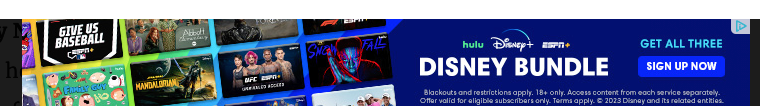